<a href="https://colab.research.google.com/github/PeterDannerHess/PeterDannerHess/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('https://query.data.world/s/ehdpn3rl4vtjcirvilftb6oy3lqvmh')

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [5]:
df.nunique()

dt                                3239
AverageTemperature               92592
AverageTemperatureUncertainty     8040
State                              241
Country                              7
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of                 dt  AverageTemperature  ...     State Country
0       1855-05-01              25.544  ...      Acre  Brazil
1       1855-06-01              24.228  ...      Acre  Brazil
2       1855-07-01              24.371  ...      Acre  Brazil
3       1855-08-01              25.427  ...      Acre  Brazil
4       1855-09-01              25.675  ...      Acre  Brazil
...            ...                 ...  ...       ...     ...
645670  2013-05-01              21.634  ...  Zhejiang   China
645671  2013-06-01              24.679  ...  Zhejiang   China
645672  2013-07-01              29.272  ...  Zhejiang   China
645673  2013-08-01              29.202  ...  Zhejiang   China
645674  2013-09-01                 NaN  ...  Zhejiang   China

[645675 rows x 5 columns]>

The data is average celsius land temperatures from 1855 to 2013. The target would be 'Country', as there are 7 categorical values to choose from. This will be a regression problem. There are five features, and almost 65,000 rows, which is where I could see challenges arising in sorting through the mass of data.

In [7]:
df.duplicated().any()

False

No duplicates.

In [8]:
df.isna().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [16]:
df.loc[0:645674, ['AverageTemperature']].fillna(method='ffill')



,AverageTemperature
0,25.544
1,24.228
2,24.371
3,25.427
4,25.675
...,...
645670,21.634
645671,24.679
645672,29.272
645673,29.202


In [10]:
df.loc[0:645674, ['AverageTemperatureUncertainty']].fillna(method='ffill')

,AverageTemperatureUncertainty
0,1.171
1,1.103
2,1.044
3,1.073
4,1.014
...,...
645670,0.578
645671,0.596
645672,1.340
645673,0.869


I chose to use "ffill" since the data is by country and state, and looking through it, substituting values near the missing value will tend to replace the missing value with data from the same country/state.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


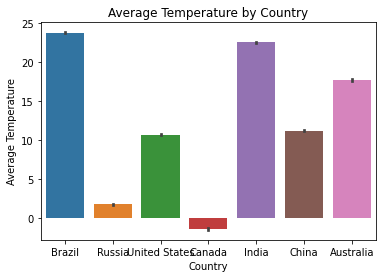

In [12]:
sns.barplot(data=df, x='Country', y='AverageTemperature')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Country');

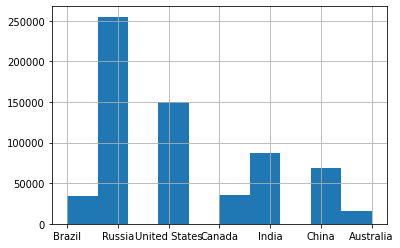

In [13]:
df['Country'].hist()

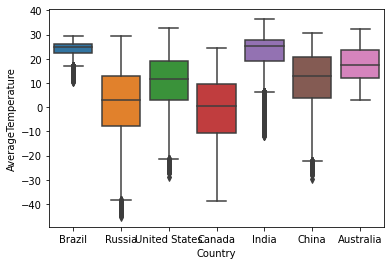

In [14]:
sns.boxplot(x = df['Country'], y = df['AverageTemperature'])

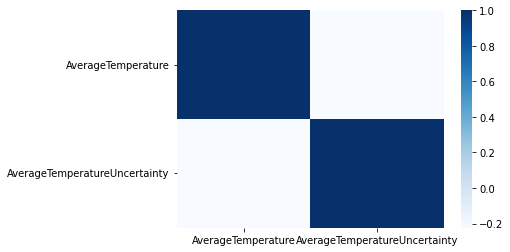

In [15]:
corr= df.corr()
sns.heatmap(corr, cmap= 'Blues')